Question-
Output variable -> y
y -> Whether the client has subscribed a term deposit or not 
Binomial ("yes" or "no")

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [9]:
df=pd.read_csv("bank-full.csv",sep=';')
df[0:5]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [10]:
df.drop(columns=['age','job','marital','default','education','contact','day','month'], inplace=True)

In [11]:
df.head()

,balance,housing,loan,duration,campaign,pdays,previous,poutcome,y
0,2143,yes,no,261,1,-1,0,unknown,no
1,29,yes,no,151,1,-1,0,unknown,no
2,2,yes,yes,76,1,-1,0,unknown,no
3,1506,yes,no,92,1,-1,0,unknown,no
4,1,no,no,198,1,-1,0,unknown,no


In [12]:
df=pd.get_dummies(df,columns=['housing','loan','poutcome'])

In [13]:
df

,balance,duration,campaign,pdays,previous,y,housing_no,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,2143,261,1,-1,0,no,0,1,1,0,0,0,0,1
1,29,151,1,-1,0,no,0,1,1,0,0,0,0,1
2,2,76,1,-1,0,no,0,1,0,1,0,0,0,1
3,1506,92,1,-1,0,no,0,1,1,0,0,0,0,1
4,1,198,1,-1,0,no,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,825,977,3,-1,0,yes,1,0,1,0,0,0,0,1
45207,1729,456,2,-1,0,yes,1,0,1,0,0,0,0,1
45208,5715,1127,5,184,3,yes,1,0,1,0,0,0,1,0
45209,668,508,4,-1,0,no,1,0,1,0,0,0,0,1


In [14]:
df['y'].replace('no','0',inplace=True)
df['y'].replace('yes','1',inplace=True)
df

,balance,duration,campaign,pdays,previous,y,housing_no,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,2143,261,1,-1,0,0,0,1,1,0,0,0,0,1
1,29,151,1,-1,0,0,0,1,1,0,0,0,0,1
2,2,76,1,-1,0,0,0,1,0,1,0,0,0,1
3,1506,92,1,-1,0,0,0,1,1,0,0,0,0,1
4,1,198,1,-1,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,825,977,3,-1,0,1,1,0,1,0,0,0,0,1
45207,1729,456,2,-1,0,1,1,0,1,0,0,0,0,1
45208,5715,1127,5,184,3,1,1,0,1,0,0,0,1,0
45209,668,508,4,-1,0,0,1,0,1,0,0,0,0,1


In [15]:
df.columns

Index(['balance', 'duration', 'campaign', 'pdays', 'previous', 'y',
       'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [16]:
df.loc[:,['balance', 'duration', 'campaign', 'pdays', 'previous','housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'poutcome_unknown','y']]

,balance,duration,campaign,pdays,previous,housing_no,housing_yes,loan_no,loan_yes,poutcome_unknown,y
0,2143,261,1,-1,0,0,1,1,0,1,0
1,29,151,1,-1,0,0,1,1,0,1,0
2,2,76,1,-1,0,0,1,0,1,1,0
3,1506,92,1,-1,0,0,1,1,0,1,0
4,1,198,1,-1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,825,977,3,-1,0,1,0,1,0,1,1
45207,1729,456,2,-1,0,1,0,1,0,1,1
45208,5715,1127,5,184,3,1,0,1,0,0,1
45209,668,508,4,-1,0,1,0,1,0,1,0


In [17]:
df.isnull().sum()

balance             0
duration            0
campaign            0
pdays               0
previous            0
y                   0
housing_no          0
housing_yes         0
loan_no             0
loan_yes            0
poutcome_failure    0
poutcome_other      0
poutcome_success    0
poutcome_unknown    0
dtype: int64

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x = df.iloc[:,:-1]
y = df['y']

In [20]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.75,random_state=1)

In [21]:
xtrain

,balance,duration,campaign,pdays,previous,y,housing_no,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_other,poutcome_success
32731,137,343,2,316,3,0,0,1,1,0,0,1,0
1498,830,246,2,-1,0,0,0,1,1,0,0,0,0
17532,1103,148,15,-1,0,0,0,1,0,1,0,0,0
8166,229,214,2,-1,0,0,0,1,1,0,0,0,0
15495,2858,247,5,-1,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43723,1830,318,3,-1,0,0,1,0,1,0,0,0,0
32511,528,233,2,-1,0,0,0,1,1,0,0,0,0
5192,4191,363,6,-1,0,0,1,0,1,0,0,0,0
12172,1783,11,11,-1,0,0,1,0,1,0,0,0,0


In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
lg = LogisticRegression()

In [24]:
lg.fit(xtrain,ytrain)
ypred = lg.predict(xtest)

In [25]:
len(xtest)

11303

In [26]:
len(ypred)

11303

In [27]:
print('Actual Y: ', ytest[:14].values)
print('Predict Y:', ypred[:14])

Actual Y:  ['0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0']
Predict Y: ['0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0']


In [28]:
from sklearn.metrics import classification_report,confusion_matrix

In [29]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      9998
           1       0.97      0.92      0.95      1305

    accuracy                           0.99     11303
   macro avg       0.98      0.96      0.97     11303
weighted avg       0.99      0.99      0.99     11303



In [30]:
confusion_matrix(ytest,ypred)

array([[9966,   32],
       [ 101, 1204]], dtype=int64)

Text(33.0, 0.5, 'Predicted Values')

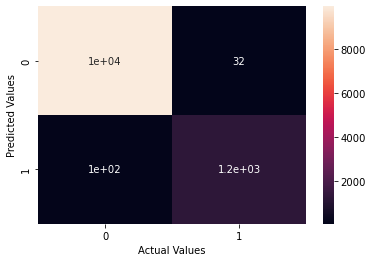

In [31]:
sns.heatmap(confusion_matrix(ytest,ypred), annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')